In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# covid data files
covid_data_path = "../Data/covid-data.csv"
face_covering_path = "../Data/face-covering-policies-covid.csv"

# read data
covid_data = pd.read_csv(covid_data_path)
facemask_data = pd.read_csv(face_covering_path)

In [2]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [3]:
facemask_data.head()

,Entity,Code,Day,facial_coverings,Unnamed: 4,Unnamed: 5
0,Afghanistan,AFG,1/1/20,0,NaN,NaN
1,Afghanistan,AFG,2/1/20,0,NaN,NaN
2,Afghanistan,AFG,3/1/20,0,NaN,NaN
3,Afghanistan,AFG,4/1/20,0,NaN,NaN
4,Afghanistan,AFG,5/1/20,0,NaN,NaN


In [4]:
# merged_covid_df['location'].unique()
# # remove rows for continents to avoid duplicate value with countries
# continent = ['North America','South America','Africa','Asia','Europe', 'International', 'World']
# covid_data[~covid_data.location.isin(continent)]

au_df = covid_data.loc[covid_data['location'] == 'Australia']
india_df = covid_data.loc[covid_data['location'] == 'India']
china_df = covid_data.loc[covid_data['location'] == 'China']
uk_df = covid_data.loc[covid_data['location'] == 'United Kingdom']
us_df = covid_data.loc[covid_data['location'] == 'United States']
brazil_df = covid_data.loc[covid_data['location'] == 'Brazil']
sk_df = covid_data.loc[covid_data['location'] == 'South Korea']

countries = [au_df, india_df, china_df, uk_df, us_df, brazil_df, sk_df]
country_df = pd.concat(countries)
country_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
5038,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,...,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,6.16
5039,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,...,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,NaN
5040,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,...,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,NaN
5041,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,NaN,NaN,...,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,NaN
5042,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,NaN,NaN,...,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80973,KOR,Asia,South Korea,2021-06-12,147874.0,452.0,531.714,1985.0,3.0,1.714,...,0.2,85.998,6.80,6.2,40.9,NaN,12.27,83.03,0.916,NaN
80974,KOR,Asia,South Korea,2021-06-13,148273.0,399.0,519.429,1988.0,3.0,2.000,...,0.2,85.998,6.80,6.2,40.9,NaN,12.27,83.03,0.916,NaN
80975,KOR,Asia,South Korea,2021-06-14,148647.0,374.0,508.000,1992.0,4.0,2.429,...,0.2,85.998,6.80,6.2,40.9,NaN,12.27,83.03,0.916,NaN
80976,KOR,Asia,South Korea,2021-06-15,149191.0,544.0,499.857,1993.0,1.0,2.286,...,0.2,85.998,6.80,6.2,40.9,NaN,12.27,83.03,0.916,NaN


In [5]:
# select required columns
# add extract month & year so we can group by month
country_df["month_year"] = country_df["date"].astype(str).str[:7]

country_df_cleaned = country_df[['month_year', 'location', 'date', 'total_cases', 'new_cases','total_deaths' ,'new_deaths']]
country_df_cleaned

,month_year,location,date,total_cases,new_cases,total_deaths,new_deaths
5038,2020-01,Australia,2020-01-26,4.0,4.0,NaN,NaN
5039,2020-01,Australia,2020-01-27,5.0,1.0,NaN,NaN
5040,2020-01,Australia,2020-01-28,5.0,0.0,NaN,NaN
5041,2020-01,Australia,2020-01-29,6.0,1.0,NaN,NaN
5042,2020-01,Australia,2020-01-30,9.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...
80973,2021-06,South Korea,2021-06-12,147874.0,452.0,1985.0,3.0
80974,2021-06,South Korea,2021-06-13,148273.0,399.0,1988.0,3.0
80975,2021-06,South Korea,2021-06-14,148647.0,374.0,1992.0,4.0
80976,2021-06,South Korea,2021-06-15,149191.0,544.0,1993.0,1.0


In [18]:
country_df_cleaned.groupby(['month_year'])['location'].nunique()

month_year
2020-01    6
2020-02    7
2020-03    7
2020-04    7
2020-05    7
2020-06    7
2020-07    7
2020-08    7
2020-09    7
2020-10    7
2020-11    7
2020-12    7
2021-01    7
2021-02    7
2021-03    7
2021-04    7
2021-05    7
2021-06    7
Name: location, dtype: int64

In [6]:
face_mask_cleaned = facemask_data[['Entity', 'Code', 'Day', 'facial_coverings']]
face_mask_cleaned

,Entity,Code,Day,facial_coverings
0,Afghanistan,AFG,1/1/20,0
1,Afghanistan,AFG,2/1/20,0
2,Afghanistan,AFG,3/1/20,0
3,Afghanistan,AFG,4/1/20,0
4,Afghanistan,AFG,5/1/20,0
...,...,...,...,...
97085,Zimbabwe,ZWE,9/6/21,3
97086,Zimbabwe,ZWE,10/6/21,3
97087,Zimbabwe,ZWE,11/6/21,3
97088,Zimbabwe,ZWE,12/6/21,3


In [17]:
fm_au_df = face_mask_cleaned.loc[face_mask_cleaned['Entity'] == 'Australia']
fm_india_df = face_mask_cleaned.loc[face_mask_cleaned['Entity'] == 'India']
fm_china_df = face_mask_cleaned.loc[face_mask_cleaned['Entity'] == 'China']
fm_uk_df = face_mask_cleaned.loc[face_mask_cleaned['Entity'] == 'United Kingdom']
fm_us_df = face_mask_cleaned.loc[face_mask_cleaned['Entity'] == 'United States']
fm_brazil_df = face_mask_cleaned.loc[face_mask_cleaned['Entity'] == 'Brazil']
fm_sk_df = face_mask_cleaned.loc[face_mask_cleaned['Entity'] == 'South Korea']

fm_countries = [fm_au_df, fm_india_df, fm_china_df, fm_uk_df, fm_us_df, fm_brazil_df, fm_sk_df]
fm_country_df = pd.concat(fm_countries)
fm_country_df

,Entity,Code,Day,facial_coverings
3680,Australia,AUS,1/1/20,0
3681,Australia,AUS,2/1/20,0
3682,Australia,AUS,3/1/20,0
3683,Australia,AUS,4/1/20,0
3684,Australia,AUS,5/1/20,0
...,...,...,...,...
79810,South Korea,KOR,10/6/21,3
79811,South Korea,KOR,11/6/21,3
79812,South Korea,KOR,12/6/21,3
79813,South Korea,KOR,13/6/21,3


In [19]:
fm_country_df.groupby(['Entity'])['facial_coverings'].nunique()

Entity
Australia         5
Brazil            4
China             4
India             3
South Korea       4
United Kingdom    4
United States     5
Name: facial_coverings, dtype: int64

In [20]:
# merge selected_covid_data and international_travel_data
merged_df = pd.merge(country_df_cleaned, fm_country_df, how='left', 
                           left_on=['date','location'], right_on = ['Day','Entity'])
merged_df

,month_year,location,date,total_cases,new_cases,total_deaths,new_deaths,Entity,Code,Day,facial_coverings
0,2020-01,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01,Australia,2020-01-29,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01,Australia,2020-01-30,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3524,2021-06,South Korea,2021-06-12,147874.0,452.0,1985.0,3.0,NaN,NaN,NaN,NaN
3525,2021-06,South Korea,2021-06-13,148273.0,399.0,1988.0,3.0,NaN,NaN,NaN,NaN
3526,2021-06,South Korea,2021-06-14,148647.0,374.0,1992.0,4.0,NaN,NaN,NaN,NaN
3527,2021-06,South Korea,2021-06-15,149191.0,544.0,1993.0,1.0,NaN,NaN,NaN,NaN


In [8]:
# merged_covid_df['location'].unique()
# # remove rows for continents to avoid duplicate value with countries
# continent = ['North America','South America','Africa','Asia','Europe', 'International', 'World']
# covid_data[~covid_data.location.isin(continent)]

au_df = merged_covid_df.loc[merged_covid_df['location'] == 'Australia']
india_df = merged_covid_df.loc[merged_covid_df['location'] == 'India']
china_df = merged_covid_df.loc[merged_covid_df['location'] == 'China']
uk_df = merged_covid_df.loc[merged_covid_df['location'] == 'United Kingdom']
us_df = merged_covid_df.loc[merged_covid_df['location'] == 'United States']
brazil_df = merged_covid_df.loc[merged_covid_df['location'] == 'Brazil']
sk_df = merged_covid_df.loc[merged_covid_df['location'] == 'South Korea']

countries = [au_df, india_df, china_df, uk_df, us_df, brazil_df, sk_df]
country_df = pd.concat(countries)
country_df

,month_year,location,date,total_cases,new_cases,total_deaths,new_deaths,Entity,Code,Day,facial_coverings
0,2020-01,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01,Australia,2020-01-29,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01,Australia,2020-01-30,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3524,2021-06,South Korea,2021-06-12,147874.0,452.0,1985.0,3.0,NaN,NaN,NaN,NaN
3525,2021-06,South Korea,2021-06-13,148273.0,399.0,1988.0,3.0,NaN,NaN,NaN,NaN
3526,2021-06,South Korea,2021-06-14,148647.0,374.0,1992.0,4.0,NaN,NaN,NaN,NaN
3527,2021-06,South Korea,2021-06-15,149191.0,544.0,1993.0,1.0,NaN,NaN,NaN,NaN


In [9]:
monthly_au_new_case = au_df.groupby(['month_year'])['new_cases'].nunique()
au_df

,month_year,location,date,total_cases,new_cases,total_deaths,new_deaths,Entity,Code,Day,facial_coverings
0,2020-01,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01,Australia,2020-01-29,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01,Australia,2020-01-30,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
503,2021-06,Australia,2021-06-12,30248.0,14.0,910.0,0.0,NaN,NaN,NaN,NaN
504,2021-06,Australia,2021-06-13,30262.0,14.0,910.0,0.0,NaN,NaN,NaN,NaN
505,2021-06,Australia,2021-06-14,30273.0,11.0,910.0,0.0,NaN,NaN,NaN,NaN
506,2021-06,Australia,2021-06-15,30286.0,13.0,910.0,0.0,NaN,NaN,NaN,NaN


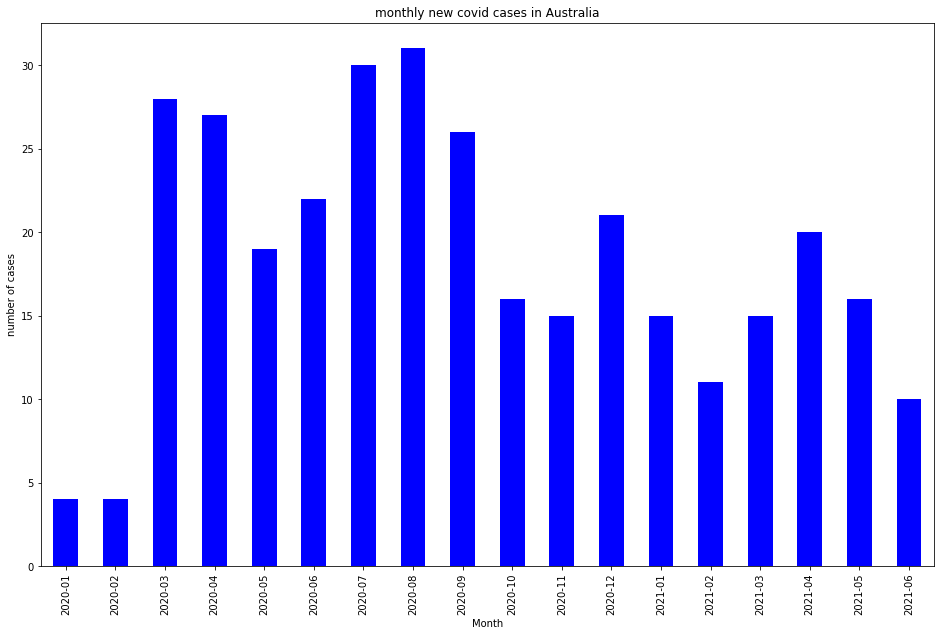

In [10]:
monthly_au_new_case.plot(kind="bar", color="b", figsize=(16, 10))
plt.title("monthly new covid cases in Australia")
plt.ylabel("number of cases")
plt.xlabel("Month")
plt.show()

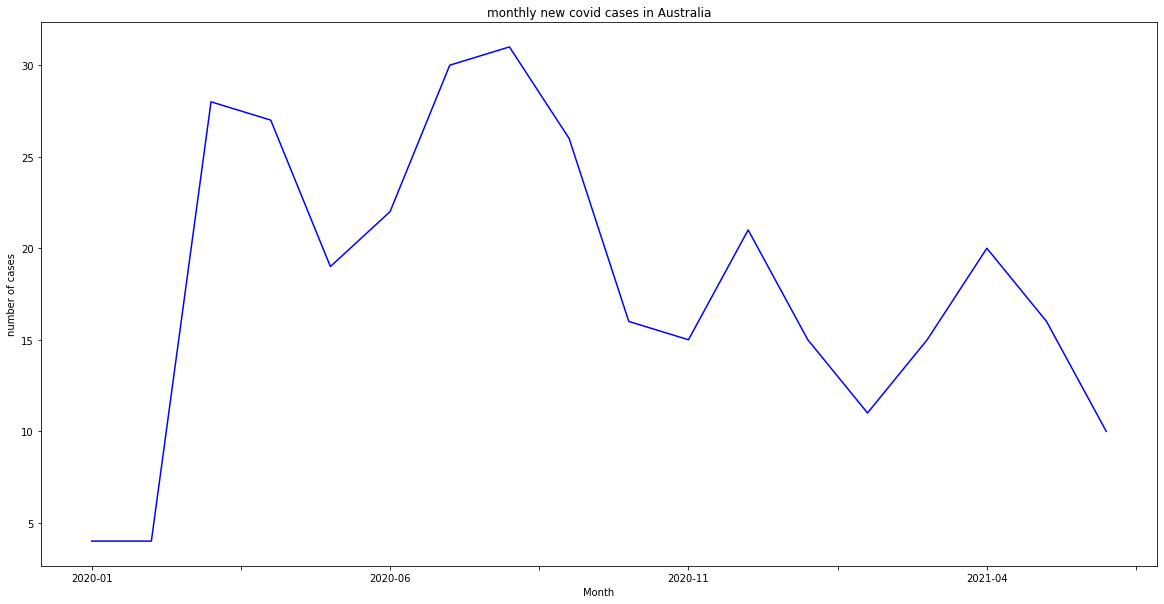

In [11]:
monthly_au_new_case.plot(kind="line", color="b", figsize=(20, 10))
plt.title("monthly new covid cases in Australia")
plt.ylabel("number of cases")
plt.xlabel("Month")
plt.show()

In [12]:
au_monthly_face_covering = au_df.groupby(['month_year'])['facial_coverings'].mean()

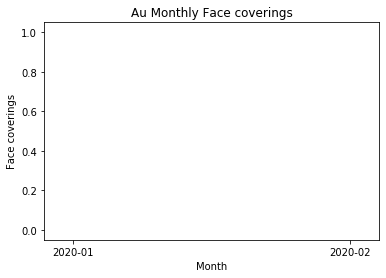

In [13]:
plt.plot(au_df['month_year'].unique(), au_monthly_face_covering, marker = 'p')
plt.xlabel("Month")
plt.ylabel("Face coverings")
plt.title("Au Monthly Face coverings")
plt.show()